# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


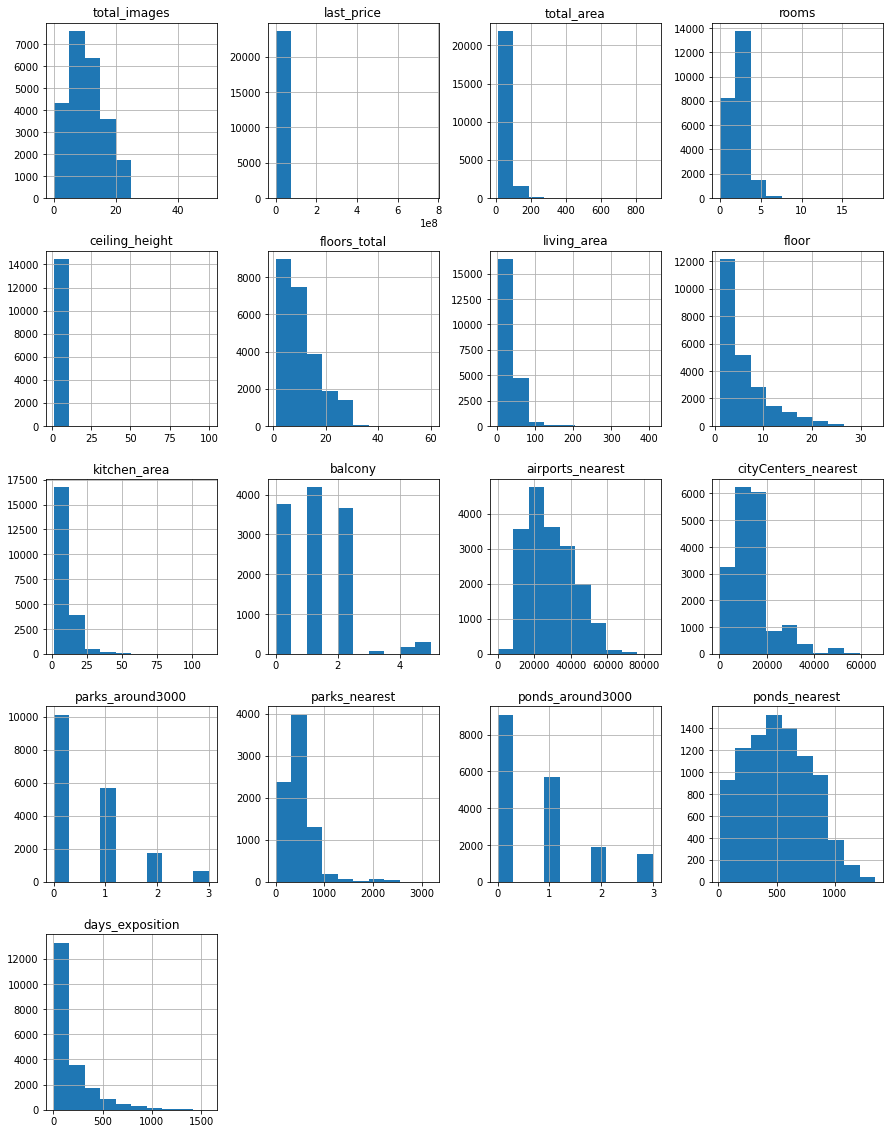

In [1]:
#открываем фал и выводим информацию на экран
import pandas as pd
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.info()
data.describe()
display(data.head())
data.hist(figsize=(15, 20));

### Предобработка данных

In [2]:
#находим количество пропущенных значений в каждом столбце
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [3]:
# check
# пропущенные значения бары

# check
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

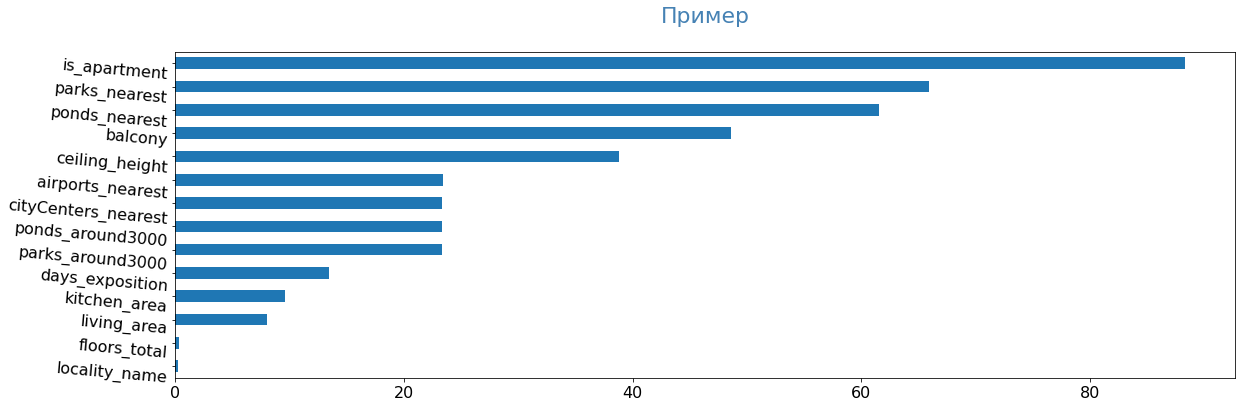

In [4]:
pass_value_barh(data)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
    
Функцию можно разломать на кусочки ☝ и собрать заново, чтобы научиться, какая команда, за что отвечает, многое тебе уже знакомо
    
___
    

In [5]:
# заменяем пропуски на 0, там, где это подходит
data['balcony']=data['balcony'].fillna(0)
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['is_apartment']=data['is_apartment'].fillna(False)
data['parks_nearest']=data['parks_nearest'].fillna(0)
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(0)
data['ponds_nearest']=data['ponds_nearest'].fillna(0)
data['airports_nearest']=data['airports_nearest'].fillna(0) 


In [6]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#заменяем пропуски медианными значениями, в столбцах ceiling_height,floors_total
ceiling_mean=data.groupby('floor')['ceiling_height'].median()
for inc_type in data['floor'].unique():
    data.loc[(data['floor']==inc_type)&(data['ceiling_height'].isna()==True),'ceiling_height']=ceiling_mean[inc_type]
floors_mean=data.groupby('last_price')['floors_total'].median()
for inc_type in data['last_price'].unique():
    data.loc[(data['last_price']==inc_type)&(data['floors_total'].isna()==True),'floors_total']=floors_mean[inc_type]
# заменим пропуски в столбцах 'kitchen_area' и 'living_area'
data['kitchen_area']=data['kitchen_area'].fillna(data['total_area']-data['living_area'])
data['living_area']=data['living_area'].fillna(data['total_area']-data['kitchen_area'])
# оставшиеся пропуски в этих столбцах заменим медианными значениями
area_mean=data.groupby('floor')['living_area'].median()
for inc_type in data['floor'].unique():
    data.loc[(data['floor']==inc_type)&(data['living_area'].isna()==True),'living_area']=area_mean[inc_type]
k_area_mean=data.groupby('floor')['kitchen_area'].median()
for inc_type in data['floor'].unique():
    data.loc[(data['floor']==inc_type)&(data['kitchen_area'].isna()==True),'kitchen_area']=k_area_mean[inc_type]

data=data.dropna(subset=['locality_name'])
data=data.dropna(subset=['ceiling_height'])
data=data.dropna(subset=['floors_total'])
print(data.isna().sum())


total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3179
dtype: int64


In [7]:
# check
data['floors_total'].value_counts()
 

5.0     5780
9.0     3776
16.0    1376
12.0    1364
4.0     1193
10.0    1179
25.0    1075
6.0      913
17.0     833
3.0      667
7.0      593
14.0     554
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     230
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      22
28.0      21
14.5       2
36.0       2
52.0       1
10.5       1
9.5        1
7.5        1
34.0       1
29.0       1
60.0       1
37.0       1
Name: floors_total, dtype: int64

Убарала обработку столбца room тк, в этом не было смысла,в нем не было пропусков.
Убрала обработку days_exposition,потому что это не позволит верно рассчитать.
Поменяла заполнение пропусков в жилой площади и площади кухни, правильнее будет отталкиваться от разницы общей площади и площади кухни, либо жилой площади, потому что иначе не учитывались сан.узлы и коридоры, остальные данные заполнила медианными значениями

In [8]:
# просмортим данные по датасету еще раз. чтоб поменять тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23607 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23607 non-null  int64         
 1   last_price            23607 non-null  float64       
 2   total_area            23607 non-null  float64       
 3   first_day_exposition  23607 non-null  datetime64[ns]
 4   rooms                 23607 non-null  int64         
 5   ceiling_height        23607 non-null  float64       
 6   floors_total          23607 non-null  float64       
 7   living_area           23607 non-null  float64       
 8   floor                 23607 non-null  int64         
 9   is_apartment          23607 non-null  bool          
 10  studio                23607 non-null  bool          
 11  open_plan             23607 non-null  bool          
 12  kitchen_area          23607 non-null  float64       
 13  balcony         

In [9]:
# меняем тип данных
for col in ['total_images','rooms','floor','balcony','floors_total','last_price']:
    data[col]=data[col].astype('int32')
for col in ['total_area','ceiling_height','kitchen_area','parks_nearest','days_exposition']:
    data[col]=data[col].astype('float32')    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23607 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23607 non-null  int32         
 1   last_price            23607 non-null  int32         
 2   total_area            23607 non-null  float32       
 3   first_day_exposition  23607 non-null  datetime64[ns]
 4   rooms                 23607 non-null  int32         
 5   ceiling_height        23607 non-null  float32       
 6   floors_total          23607 non-null  int32         
 7   living_area           23607 non-null  float64       
 8   floor                 23607 non-null  int32         
 9   is_apartment          23607 non-null  bool          
 10  studio                23607 non-null  bool          
 11  open_plan             23607 non-null  bool          
 12  kitchen_area          23607 non-null  float32       
 13  balcony         

In [10]:
#изучаем уникальные названия в столбце locality_name,меняем дубликаты на пропуски
data['locality_name'].unique()
def func_name(locality_name):
    up_name = []
    for word in locality_name.split():
        for w in word:
            if w.isupper():
                up_name.append(word)
                break
    return ' '.join(up_name)
data['locality_name']=data['locality_name'].apply(func_name)

Используем функцию

In [11]:
# проверяем столбей, на дубликаты
data['locality_name'].unique()


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

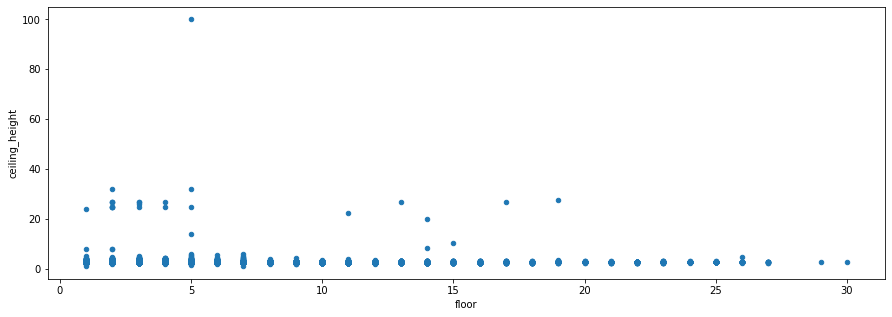

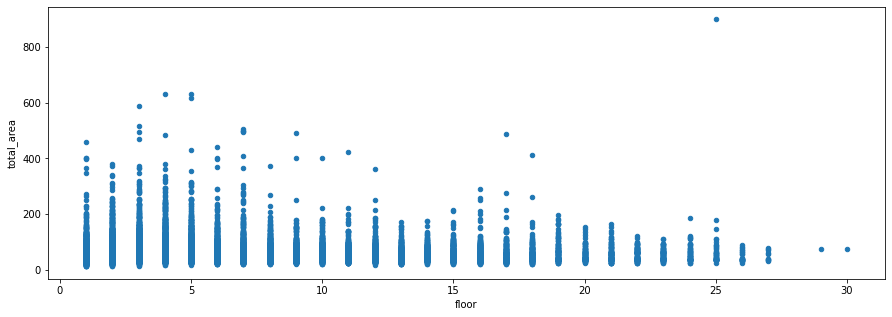

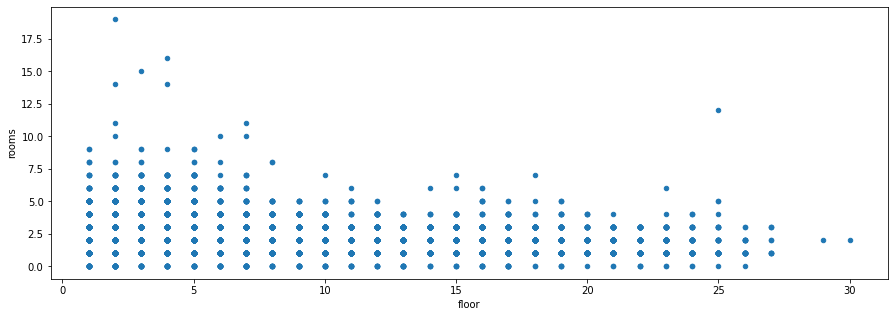

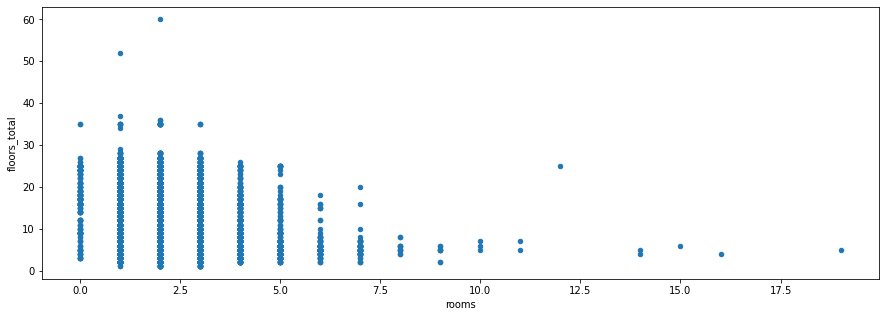

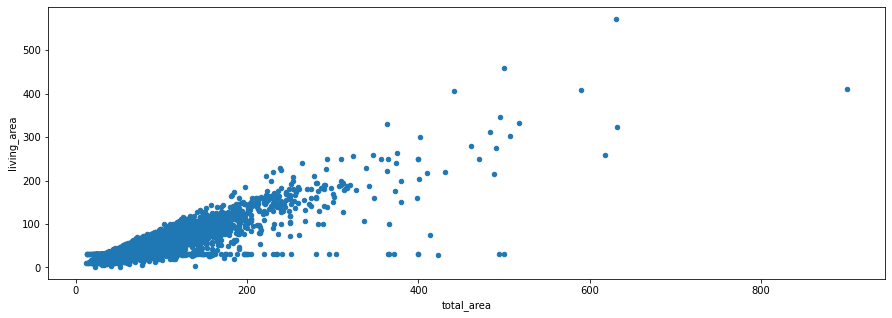

In [12]:
# проверяем редкие и выбивающиеся значения в столбцах, в которых это нам интересно
data.plot(x='floor',y='ceiling_height',kind='scatter',style='-',figsize=(15,5)); 
data.plot(x='floor',y='total_area',kind='scatter',style='-',figsize=(15,5)); 
data.plot(x='floor',y='rooms',kind='scatter',style='-',figsize=(15,5)); 
data.plot(x='rooms',kind='scatter',y='floors_total',style='-',figsize=(15,5)); 
data.plot(x='total_area',kind='scatter',y='living_area',style='-',figsize=(15,5)); 
# видим, что выбросы есть, далее будем избавляться от них


In [13]:
#меняем аномально высокие данные на корректные
data.loc[data['ceiling_height']>5,'ceiling_height']=data.loc[data['ceiling_height']>5,'ceiling_height']/10
data.loc[data['ceiling_height']<2,'ceiling_height']=data.loc[data['ceiling_height']==0,'ceiling_height']
data['ceiling_height'].describe()


count    23591.000000
mean         2.694745
std          0.222684
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [14]:
data.loc[data['rooms']>18,'rooms']=data.loc[data['rooms']==0,'rooms']
data['rooms'].describe()    


count    23606.000000
mean         2.069516
std          1.073312
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

In [15]:
data.loc[data['total_area']>400,'total_area']=data.loc[data['total_area']==0,'total_area']
data['total_area'].describe()    


count    23584.000000
mean        59.881054
std         32.625156
min         12.000000
25%         40.000000
50%         52.000000
75%         69.599998
max        400.000000
Name: total_area, dtype: float64

In [16]:
data.loc[data['living_area']<=17,'living_area']=data.loc[data['living_area']==0,'living_area']
data.loc[data['living_area']>150,'living_area']=data.loc[data['living_area']==0,'living_area']
data['living_area'].describe()    

count    20268.000000
mean        36.509686
std         17.635506
min         17.010000
25%         26.800000
50%         31.400000
75%         43.200000
max        150.000000
Name: living_area, dtype: float64

In [17]:
data.loc[data['last_price']<=12190,'last_price']=data.loc[data['last_price']==0,'last_price']
data['last_price'].describe()    

count    2.360600e+04
mean     6.541340e+06
std      1.090321e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В ходе преодобрабоки данных:
Были заполнены значемые строки для гипотез.
Было выполнено удаление значений, относящиеся к мошенническим, и тех значимых, пустоты которых не возможно было заполнить.
Была произведена смена типов данных.
Были найдены и подкорректированы выбросы в данных.

In [51]:
###### check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,606.00","23,584.00","23,591.00","20,428.00","23,606.00","20,268.00","23,607.00","23,607.00","23,607.00"
min,0.00,12.00,2.00,1.00,"430,000.00",17.01,0.00,1.00,1.00
max,16.00,400.00,10.00,"1,580.00","763,000,000.00",150.00,230.00,30.00,60.00


### Посчитайте и добавьте в таблицу новые столбцы

In [19]:
#посчитаем цену квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']

#создаю столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создаю столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#создаю столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year





In [20]:

#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor <= 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)
data['floor_category'].value_counts() 

другой       17342
последний     3333
первый        2911
Name: floor_category, dtype: int64

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Функция хорошая, стоит учесть крайние условия: нулевые и отрицательные значения

In [21]:
#переводим столбец расстояние до центра города в километры
data['cityCenters_nearest_km']= data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'].astype('int32')




0        16
1        18
2        13
3         6
4         8
         ..
23694     4
23695     0
23696     0
23697    10
23698     0
Name: cityCenters_nearest_km, Length: 23607, dtype: int32

Все данные для гипотезы подготовлены

### Проведите исследовательский анализ данных

Построим гистограммы для следующих данных: площадь общая, жилая и площадь кухни, цена, число комнат, высота потолков, этаж квартиры,тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;расстояние до центра города в метрах;расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;день и месяц публикации объявления

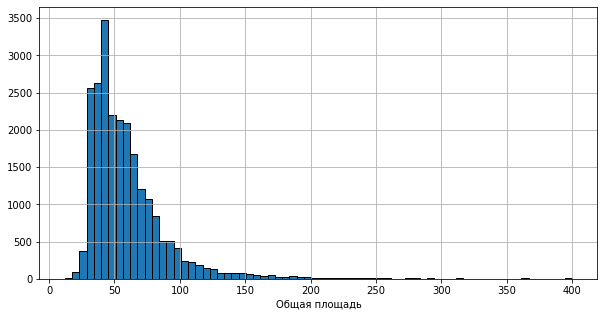

In [22]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins=70, figsize=(10,5), ec='black').set(xlabel = 'Общая площадь');



здесь мы видим, что общая площадь квартир от 15м2 до 155 м2, наибольшее количество квартир от 45 до 50 м2

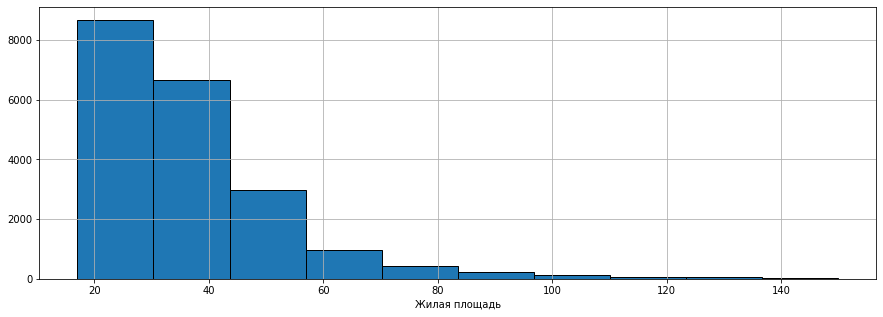

In [23]:
data['living_area'].hist(bins=10, figsize=(15,5), ec='black').set(xlabel ='Жилая площадь');

Исследуя жилую площадь, мы видим, что большее количество обьявлений с квартирами до 50 м2.

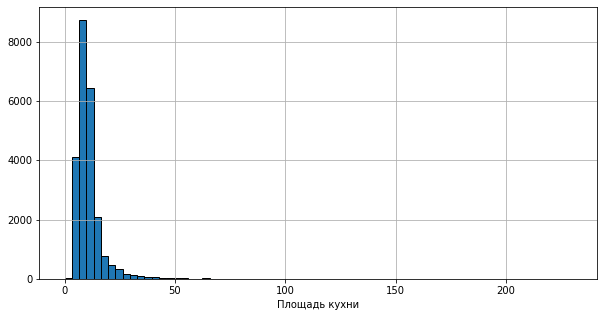

In [24]:
data['kitchen_area'].hist(bins=70, figsize=(10,5), ec='black').set(xlabel ='Площадь кухни');

Исследуя площадь кухни, мы видим, что большее количество обьявлений с площадью кухни около 10 м2.

count    2.360600e+04
mean     6.541340e+06
std      1.090321e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

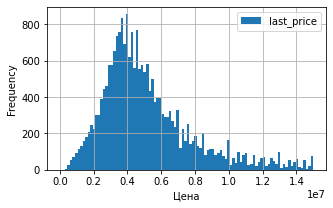

In [25]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3)).set(xlabel ='Цена');
data['last_price'].describe()

Больше всех квартир находяться в районе 6000000 рублей. 

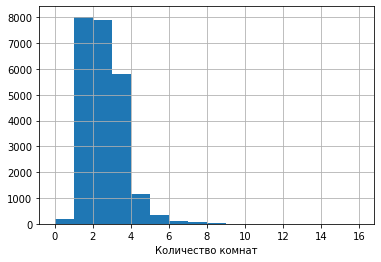

In [26]:
data['rooms'].hist(bins=16).set(xlabel ='Количество комнат');

Здесь мы видим, что больше всего однокомнатных и двухкомнатных квартир.

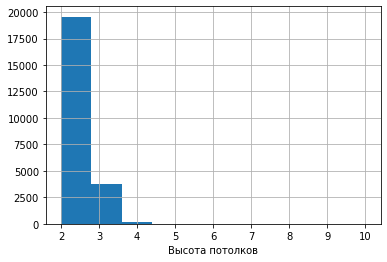

In [27]:
data['ceiling_height'].hist(bins=10).set(xlabel ='Высота потолков');

Большинсnво кварnир имеют высоту от 2.5 до 2.75 м.

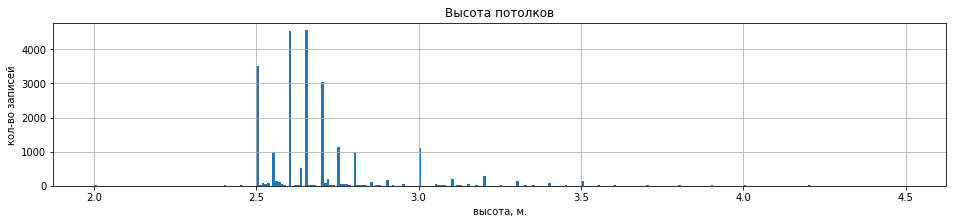

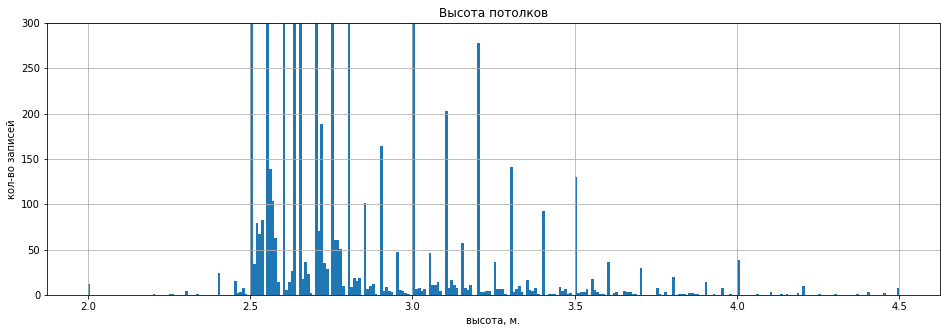

In [28]:
# check
# построим график значений для столбца с высотой потолков

import matplotlib.pyplot as plt

(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', 
              bins=300, range=(2,4.5), grid=True, title='Высота потолков', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'высота, м.')
)
plt.show()
(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', 
              bins=300, range=(2,4.5), grid=True, title='Высота потолков', figsize=(16,5))
        .set(ylim = (0, 300), ylabel = 'кол-во записей', xlabel = 'высота, м.')
        
)
plt.show()

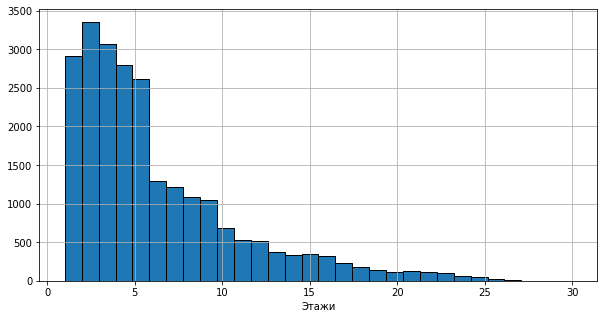

In [29]:
data['floor'].hist(bins=30, figsize=(10,5), ec='black').set(xlabel ='Этажи');

Большая часть вкартир располагается со 2 по 6 этаж

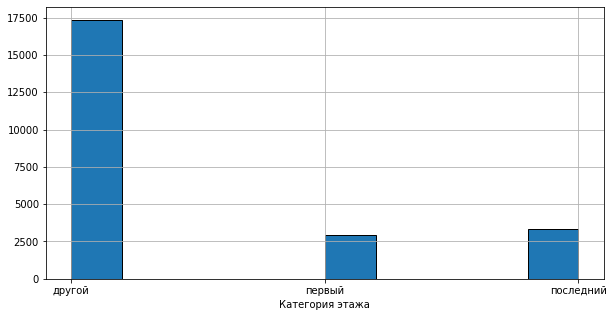

In [30]:
data['floor_category'].hist(bins=10, figsize=(10,5), ec='black').set(xlabel ='Категория этажа');

Также мы можем заметить, что меньше что меньше всего квартир на первом и последних этажах.

<AxesSubplot:>

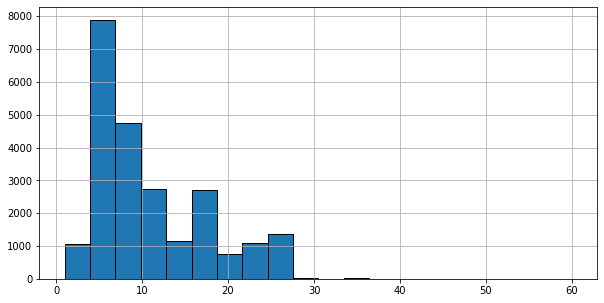

In [31]:
data['floors_total'].hist(bins=20, figsize=(10,5), ec='black')

Мы видим что большая часть квартир находятся в домах с 3 до 18 этажами. Домов свыше 25 этажей очень мало.

count    23607.000000
mean     10878.680391
std       9636.695985
min          0.000000
25%       2209.500000
50%      11246.000000
75%      15233.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

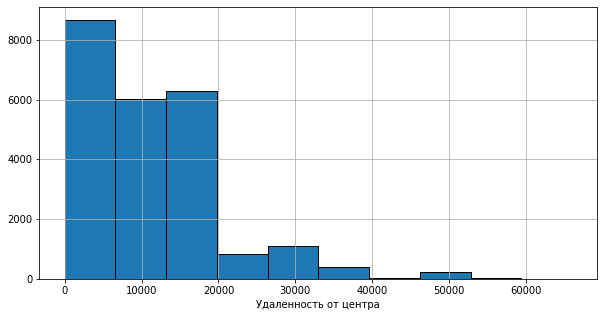

In [32]:
data['cityCenters_nearest'].hist(bins=10, figsize=(10,5), ec='black').set(xlabel ='Удаленность от центра');
data['cityCenters_nearest'].describe()

большая часть обьявлений с квартирами, находящимися до 8000 метров от центра

count    23607.000000
mean     22054.827763
std      16466.055898
min          0.000000
25%      10143.000000
50%      21860.000000
75%      34331.000000
max      84869.000000
Name: airports_nearest, dtype: float64

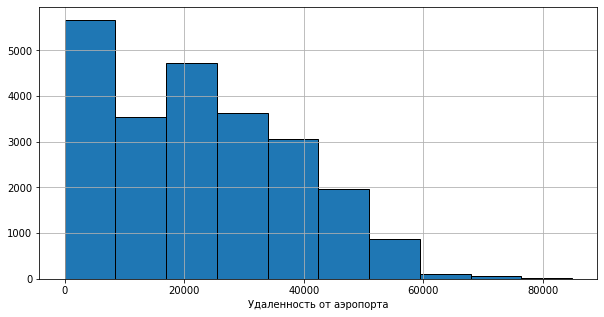

In [33]:
data['airports_nearest'].hist(bins=10, figsize=(10,5), ec='black').set(xlabel ='Удаленность от аэропорта');
data['airports_nearest'].describe()

Здесь мы видим, что квартиры больше всего находятся в 100000 и 20000 м от аэропортов

count    23607.000000
mean       167.311981
std        306.658508
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

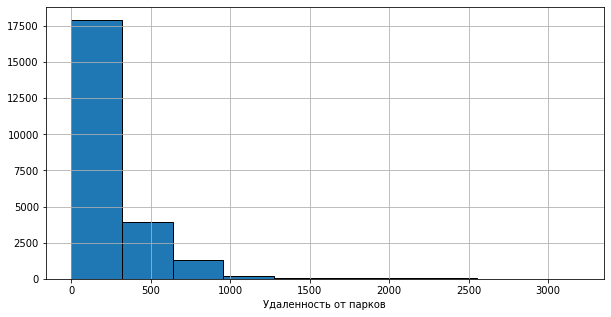

In [34]:
data['parks_nearest'].hist(bins=10, figsize=(10,5), ec='black').set(xlabel ='Удаленность от парков');
data['parks_nearest'].describe()

Видим, что много квартир у парков.

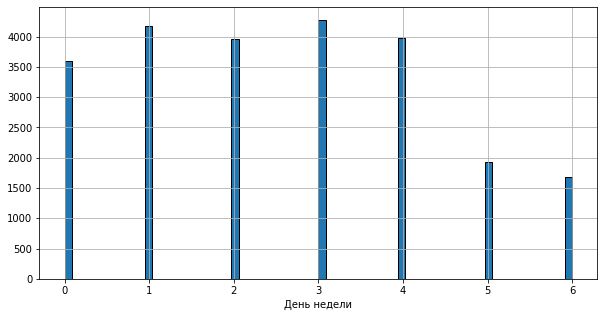

In [35]:
data['weekday_exposition'].hist(bins=70, figsize=(10,5), ec='black').set(xlabel ='День недели');

Меньше всего обьявлений выставляется в выходные

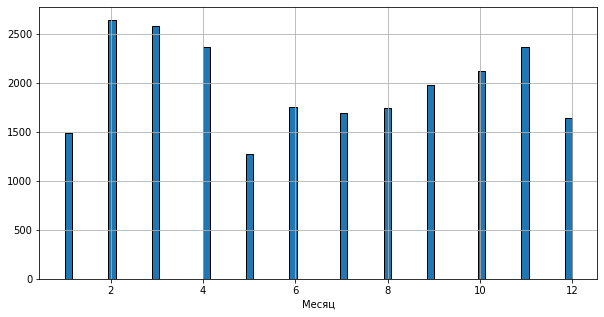

In [36]:
data['month_exposition'].hist(bins=70, figsize=(10,5), ec='black').set(xlabel ='Месяц');

Меньше всего обьявлений выставляется в январе и в мае, предполагаю, что изза большого количества праздничных дней

#### Скорость продажи

count    20428.000000
mean       180.754105
std        219.800400
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

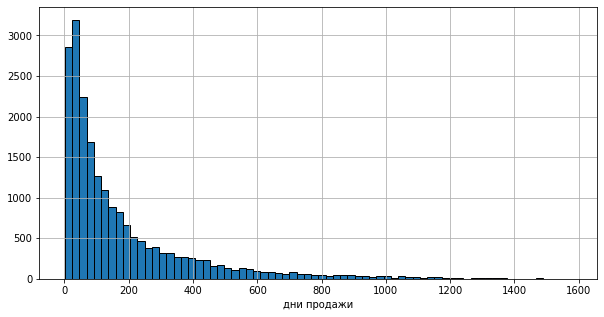

In [37]:
# далее изучим как быстро продавались квартиры
data['days_exposition'].hist(bins=70, figsize=(10,5), ec='black').set(xlabel ='дни продажи');
#с помощью метода увидим среднее значение,медианное,минимально и максимально возможно
data['days_exposition'].describe()

Мы видим что среднее значение количества дней продажи 180 дней, медианное 95 дней. Есть значения например 1 день и 5 лет, которые возможны, но скорее всего те, что продавались 5 лет это обьявления, которые забыли закрыть, а те что продавались 1 день, мошенические.
Я думаю что быстрой продажей можно считать 45 дней, а долгой это 231 дней. 
Зачения, которые находятся внутри наших выбивающихся значений.
Большая часть квартир продавалась в течение первых 100 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи.

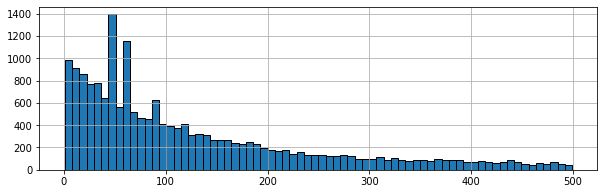

In [38]:
# Ограничим срок продажи 500 днями, чтоб убрать выбросы. Посмотрим на данные более детально:
data.query('days_exposition<500')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black');

Здесь по прежнему видим большое количество квартир проданных спустя 100 дней, есть вероятность, что обьявления либо автоматически закрываются,но возможно это и реальные значения)

'Корреляция Пирсона равна'

0.6248386954130137

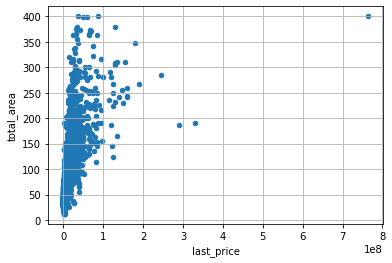

In [39]:
data.pivot_table(index='total_area',values='last_price', aggfunc='median')
data.plot(x='last_price',y='total_area',kind='scatter',grid=True)
display('Корреляция Пирсона равна',data['total_area'].corr(data['last_price']))


Мы видим,зависимость есть, коэффициент корреляции Пирсона=0,62. Это значит, что чем больше площадь жилья, стоимость обьекта недвижимости увеличивается.

Изменила графики на тип scatter, тк мы изменили обработку данных, данных немного изменились.

In [40]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'mean', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,606.00","23,584.00","23,591.00","20,428.00","23,606.00","20,268.00","23,607.00","23,607.00","23,607.00"
min,0.00,12.00,2.00,1.00,"430,000.00",17.01,0.00,1.00,1.00
mean,2.07,59.88,2.69,180.75,"6,541,339.52",36.51,10.75,5.88,10.67
max,16.00,400.00,10.00,"1,580.00","763,000,000.00",150.00,230.00,30.00,60.00


In [41]:
# check
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df_check['total_area'].corr(df_check['last_price'])

0.6536750579657242

'Корреляция Пирсона равна'

0.3636314613912241

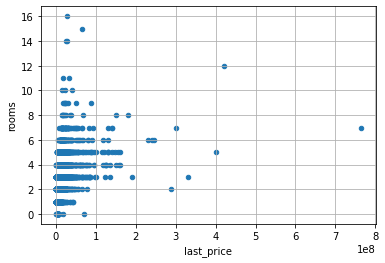

In [42]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median')
data.plot(x='last_price',y='rooms',kind='scatter',grid=True)
display('Корреляция Пирсона равна',data['rooms'].corr(data['last_price']))


Мы видим, что зависимости практически нет.

'Корреляция Пирсона равна'

0.4804443151394527

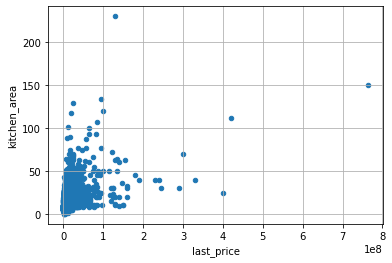

In [43]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
data.plot(x='last_price',y='kitchen_area',kind='scatter',grid=True)
display('Корреляция Пирсона равна',data['kitchen_area'].corr(data['last_price']))


'Корреляция Пирсона равна'

0.516089674689898

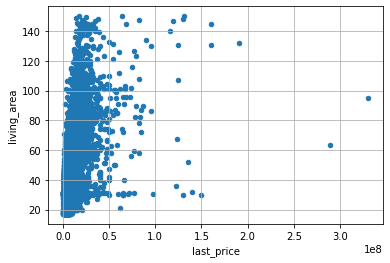

In [44]:
data.pivot_table(index='living_area', values='last_price', aggfunc='median')
data.plot(x='last_price',y='living_area',kind='scatter',grid=True)
display('Корреляция Пирсона равна',data['living_area'].corr(data['last_price']))

Видим гораздо большую зависимость цены квартиры, от жилой площади и площади кухни.
Чем больше площадь,тем выше цена.

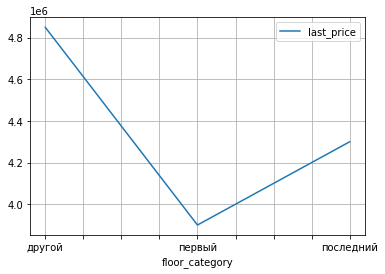

In [45]:
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True);

На этом графике четко видно, что самые дешевые квартиры на первом этаже, далее идет последний этаж.


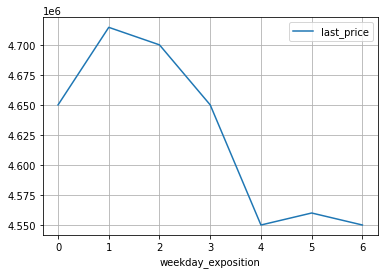

In [46]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(grid=True);

Здесь мы можем заметить, что цены на вкартиры, которые выставили на выходные ниже, чем в начале и середине недели

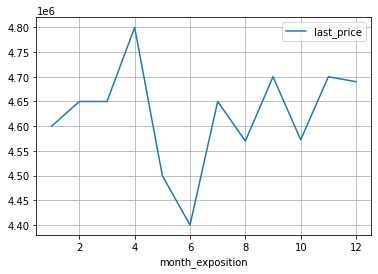

In [47]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(grid=True);

Здесь мы видим, что в летом, стоимость квартир дешевле, очевидно, что спрос на квартиры в летние месяцы гораздо меньше.

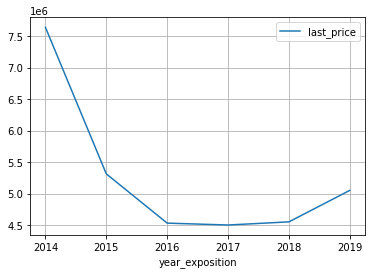

In [48]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(grid=True);

В этом графике мы можем наблюдать всплеск цен в 2014 году, далее все шло более менее стабильно, но затем, в 2019 году снова пошел рост.

In [49]:
top10 = data['locality_name'].value_counts().index.tolist()[:10]
mean10_m = [data[data['locality_name'] == city]['price_per_meter'].median().round(2) for city in top10]
mean10_prices = [data[data['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': mean10_m, 'Средняя цена за квартиру, тыс. руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, тыс. руб."
0,Санкт-Петербург,104805.92,5500000.0
5,Пушкин,100000.00,5180000.0
2,Кудрово,95675.47,3890000.0
7,Парголово,91642.86,4100000.0
1,Мурино,86175.64,3400000.0
3,Шушары,76876.17,3950000.0
6,Колпино,74723.75,3600000.0
8,Гатчина,67796.61,3100000.0
4,Всеволожск,65789.47,3450000.0
9,Выборг,58158.32,2897000.0


Как и предполагалось, самые дорогие квартиры  в Санкт-Петербурге и парковом городе Пушкине. Чем дальше от города, тем дешевле. В Выборге средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

,price_per_meter
cityCenters_nearest_km,
0,174015.535195
1,166896.190618
2,143871.731983
3,129416.344572
4,137240.112687
5,145556.119849
6,152100.871468
7,140598.581428
8,120581.728194


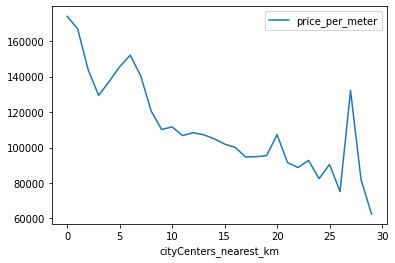

In [50]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

Мы можем наблюдать зависимость цены, от расстояния до центра, есть конечно пики, в 8 км например,это значит что в Санкт-Петербурге, есть хорошие районы, которые не находятся в центре, но спрос и цены на недвижимость там высок.

### Общий вывод

Мы изучили данные по продаже недвижимости.
Обработали данные,так,чтоб пропуски не влияли на наше исследование.
Из данного иссследования можем заметить,что больше всего квартир продается в 5 этажных домах.
Из данного исследования мы можем заметить, что стоимость квартир в Санкт-Петербурге гораздо выше в среднем 104800 за квадратный метр, чем в области в Пушкине например уже окола 100000 за квадратный метр.
Есть небольшая зависимость, между площадью жилого помещения,площадью кухни,общей площадью, количеством комнат и ценой, цена повышается,но не сильно.
Можем сделать вывод, что квартиры на первом этаже, дешевле остальных.
Можем увидить, что выставленный обьявления весной, дороже, чем в летние месяцы.
Квартиры, находящиеся в центре, также дороже примерно 174000 за квадратный метр,в целом чем дальше от центра, тем дешевле, не считая, некоторых районов.
В среднем квартиры продаются примерно полгода.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [X]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [X]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод